In [1]:
%matplotlib inline
import tellurium as te
import numpy as np
import lmfit   # Fitting lib
import math
import random 
import matplotlib.pyplot as plt
import model_fitting as mf

In [6]:
# Model
model = """
     A -> B; k1*A
     B -> C; k2*B
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0.1
     k2 = 0.2
"""
parameters = mf.makeParameters(constants=['k1', 'k2'])

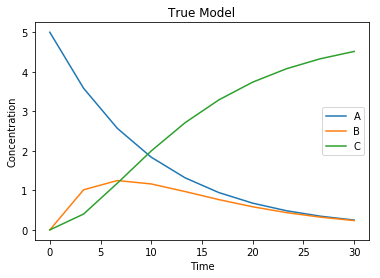

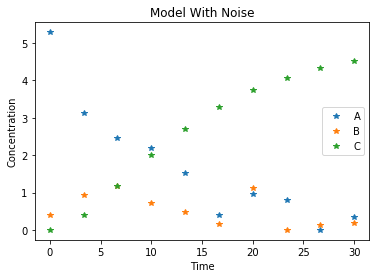

In [7]:
# Create synthetic observational data and plot it.
true_data = mf.runSimulation(model=model)
obs_data = mf.makeObservations(model=model, noise_std=0.5)
columns = ['A', 'B', 'C']
mf.plotTimeSeries(true_data, title="True Model", columns=columns)
mf.plotTimeSeries(obs_data, title="Model With Noise", is_scatter=True, columns=columns)

In [8]:
# Parameter fitting
# Illustration of parameter fitting
parameters = mf.fit(obs_data, model=model, parameters=parameters)
parameters

name,value,standard error,relative error,initial value,min,max,vary
k1,0.09518558,0.00493332,(5.18%),1,0.00000000,10.0000000,True
k2,0.24700641,0.02880409,(11.66%),1,0.00000000,10.0000000,True


In [9]:
# Cross validate to fit model
mf.crossValidate(obs_data, model=model, parameters=parameters, num_folds=3)

([Parameters([('k1',
               <Parameter 'k1', value=0.10039496449060048 +/- 0.00643, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.25474938239327394 +/- 0.0367, bounds=[0:10]>)]),
  Parameters([('k1',
               <Parameter 'k1', value=0.09714066474849792 +/- 0.00646, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.23028826358890253 +/- 0.0319, bounds=[0:10]>)]),
  Parameters([('k1',
               <Parameter 'k1', value=0.08833568942948955 +/- 0.00517, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.2585877838836187 +/- 0.0376, bounds=[0:10]>)])],
 [0.9744768978388502, 0.9676635542725215, 0.9635222557713037])

In [2]:
# A model to analyzie
model = """
     A -> B; k1*A
     B -> C; k2*B
     C -> D; k3*C
      
     A = 5;
     B = 0;
     C = 0;
     D = 0;
     k1 = 0.1
     k2 = 0.2
     k3 = 0.3
"""
parameters = mf.makeParameters(constants=['k1', 'k2', 'k3'])

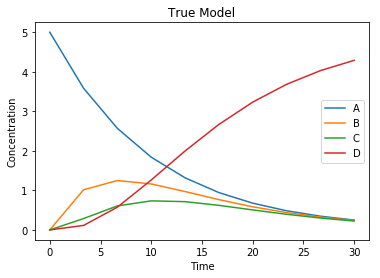

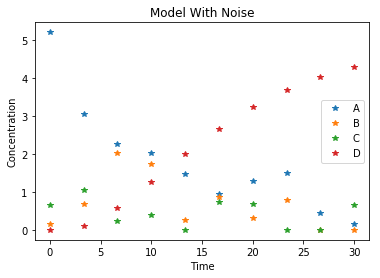

In [3]:
# Create synthetic observational data and plot it.
pure_data = mf.runSimulation(model=model)
obs_data = mf.makeObservations(model=model, noise_std=0.5)
columns = ['A', 'B', 'C', 'D']
mf.plotTimeSeries(pure_data, title="True Model", columns=columns)
mf.plotTimeSeries(obs_data, title="Model With Noise", is_scatter=True, columns=columns)

In [4]:
# Illustration of parameter fitting
parameters = mf.fit(obs_data, model=model, parameters=parameters)
parameters

name,value,standard error,relative error,initial value,min,max,vary
k1,0.09361494,0.00698353,(7.46%),1,0.00000000,10.0000000,True
k2,0.18988093,0.02722599,(14.34%),1,0.00000000,10.0000000,True
k3,0.41487565,0.12331597,(29.72%),1,0.00000000,10.0000000,True


In [5]:
# Cross validate to fit model
mf.crossValidate(obs_data, model=model, parameters=parameters, num_folds=3)

([Parameters([('k1',
               <Parameter 'k1', value=0.09460411322810947 +/- 0.00964, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.1920673823557023 +/- 0.0382, bounds=[0:10]>),
              ('k3',
               <Parameter 'k3', value=0.45680966314220695 +/- 0.205, bounds=[0:10]>)]),
  Parameters([('k1',
               <Parameter 'k1', value=0.1031964416199066 +/- 0.00787, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.16903428421669642 +/- 0.0212, bounds=[0:10]>),
              ('k3',
               <Parameter 'k3', value=0.34679685827457396 +/- 0.0847, bounds=[0:10]>)]),
  Parameters([('k1',
               <Parameter 'k1', value=0.0843013953969246 +/- 0.00802, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.21950026366100606 +/- 0.0477, bounds=[0:10]>),
              ('k3',
               <Parameter 'k3', value=0.4401035314344337 +/- 0.184, bounds=[0:10]>)])],
 [0.9616636664420197, 0.